# 支持向量机 SVM

这一节书里也讲的好好。

支持向量机（Support Vector Machine, SVM）是一种二分类模型，目标是寻找一个标准（称为超平面）对样本数据进行分割，分割的原则是确保分类最优化（类别之间的间隔最大）。

当数据集较小时，使用支持向量机进行分类非常有效。支持向量机是最好的现成分类器之一，这里所谓的“现成”是指分类器不加修改即可直接使用。

Python提供了不同的实现支持向量机的库（例如sk-learn库、LIBSVM库等）,OpenCV也提供了对支持向量机的支持，对于上述库，基本都可以直接使用，无须深入了解支持向量机的原理。

## 原理

在构造分类器时，非常重要的一项工作就是找到最优分类器。

如何找到支持向量机：在已有数据中，找到离分类器最近的点，确保它们离分类器尽可能地远。

### 将不可分变成可分

举个例子，假设我们不小心将豌豆和小米混在了一起。豌豆的个头很大，直径在10mm左右；小米个头小，直径在1mm左右。如果想把它们分开，直接使用直线是不行的。此时，我们可以使用直径为3 mm的筛子，将豌豆和小米区分开。在某种意义上，这个筛子就是映射操作，它将豌豆和小米有效地分开了。

![svm的解释](images/svm_explain.jpg)

# OpenCV SVM 案例

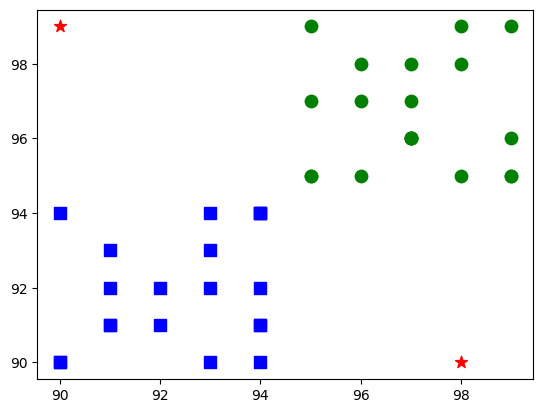

[[98. 90.]
 [90. 99.]]
[[0.]
 [0.]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 第1步 准备数据
# 表现为A级的员工的笔试、面试成绩
a = np.random.randint(95,100, (20, 2)).astype(np.float32)
# 表现为B级的员工的笔试、面试成绩
b = np.random.randint(90,95, (20, 2)).astype(np.float32)
# 合并数据
data = np.vstack((a, b))
data = np.array(data, dtype='float32')
# 第2步 建立分组标签，0代表A级，1代表B级
#aLabel对应着a的标签，为类型0-等级A
aLabel=np.zeros((20,1))
#bLabel对应着b的标签，为类型1-等级B
bLabel=np.ones((20,1))
# 合并标签
label = np.vstack((aLabel, bLabel))
label = np.array(label, dtype='int32')
# 第3步 训练
# 用ml机器学习模块 SVM_create() 创建svm
svm = cv2.ml.SVM_create()
# 属性设置，直接采用默认值即可
#svm.setType(cv2.ml.SVM_C_SVC) # svm type
#svm.setKernel(cv2.ml.SVM_LINEAR) # line
#svm.setC(0.01)
# 训练
result = svm.train(data, cv2.ml.ROW_SAMPLE, label)
# 第4步 预测
# 生成两个随机的笔试成绩和面试成绩数据对
test = np.vstack([[98,90], [90,99]])
test = np.array(test, dtype='float32')
# 预测
(p1, p2) = svm.predict(test)
# 第5步 观察结果
# 可视化
plt.scatter(a[:,0], a[:,1], 80, 'g', 'o')
plt.scatter(b[:,0], b[:,1], 80, 'b', 's')
plt.scatter(test[:,0], test[:,1], 80, 'r', '*')
plt.show()
# 打印原始测试数据test，预测结果
print(test)
print(p2)